# Transformation calculation between two Pauli frames.

In [3]:
import os, sys
sys.path.append("..")

In [4]:
import os, sys
sys.path.append("..")
from opttrot.pauli import from_pstr
from opttrot.pauli_frame import PauliFrame
from opttrot.hamiltonian import Hamiltonian
from opttrot.utils import _bitwise_count_c

from opttrot.graph_algs.graph_opts import DWave

/Users/hyunseongkim/Documents/GitHub/Org_OptTrot/OptTrot/test/../opttrot/pauli_frame.py:25: SyntaxWarning: invalid escape sequence '\d'
  """SWAP and H, S, S^\dagger must not affect to the equivalent states."""


In [5]:
import numpy as np
np.version.version
from matplotlib import pyplot as plt

# Test with IZ family Hamiltonian

In [6]:
# Random IZ Hamiltonian
qubits = 4
N = int(2**qubits)
H = np.diag(np.random.rand(N)).astype(complex)
#H[1,2] = 0.4
#H[2,1] = 0.4

In [7]:
hamiltonian = Hamiltonian(H)

In [6]:
a = hamiltonian.poly

In [7]:
a

array([PauliElement(n=4, weight=0.246572+(0.000000)j, IIII),
       PauliElement(n=4, weight=0.136122+(0.000000)j, IIIZ),
       PauliElement(n=4, weight=0.709914+(0.000000)j, IIZI),
       PauliElement(n=4, weight=0.798279+(0.000000)j, IIZZ),
       PauliElement(n=4, weight=0.723069+(0.000000)j, IZII),
       PauliElement(n=4, weight=0.928466+(0.000000)j, IZIZ),
       PauliElement(n=4, weight=0.922367+(0.000000)j, IZZI),
       PauliElement(n=4, weight=0.812284+(0.000000)j, IZZZ),
       PauliElement(n=4, weight=0.764821+(0.000000)j, ZIII),
       PauliElement(n=4, weight=0.282787+(0.000000)j, ZIIZ),
       PauliElement(n=4, weight=0.370023+(0.000000)j, ZIZI),
       PauliElement(n=4, weight=0.165518+(0.000000)j, ZIZZ),
       PauliElement(n=4, weight=0.089774+(0.000000)j, ZZII),
       PauliElement(n=4, weight=0.930000+(0.000000)j, ZZIZ),
       PauliElement(n=4, weight=0.782333+(0.000000)j, ZZZI),
       PauliElement(n=4, weight=0.438915+(0.000000)j, ZZZZ)], dtype=object)

In [8]:
st = [s for p, s in hamiltonian.terms]
st

['IIII',
 'IIIZ',
 'IIZI',
 'IIZZ',
 'IZII',
 'IZIZ',
 'IZZI',
 'IZZZ',
 'ZIII',
 'ZIIZ',
 'ZIZI',
 'ZIZZ',
 'ZZII',
 'ZZIZ',
 'ZZZI',
 'ZZZZ']

In [9]:
mat = hamiltonian.adj_mat

In [42]:
from dwave.cloud import Client
from dwave.system.samplers import DWaveCliqueSampler
import dwave_networkx as dnx

import rustworkx as rx
import networkx as nx

token = r"yXwP-57ffecb35c6d604ff99be7b49223982f60ea4b42"

In [11]:
client = Client(token= token)

In [12]:
sampler_cli = DWaveCliqueSampler(token= token)

In [13]:
g = hamiltonian.to_graph(networkx=True)

In [14]:
len(g)

16

In [15]:
dnx.maximum_clique(g,  sampler = sampler_cli)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [16]:
L = hamiltonian.get_commuting_group(solver = None)

In [17]:
len(L[0])

16

In [18]:
adj = rx.adjacency_matrix(hamiltonian.to_graph())
G = nx.from_numpy_array(adj)

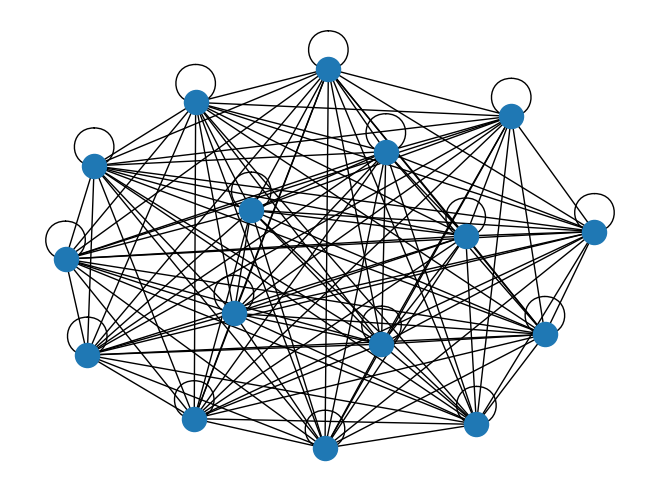

In [19]:
nx.draw(G)

In [20]:
sampler_cli = DWaveCliqueSampler(token= token)
clique = dnx.maximum_clique(G, sampler = sampler_cli)

In [21]:
dwave_solver = DWave(token=token)

In [22]:
hamiltonian.get_commuting_group(solver = dwave_solver)

Get a client:
Initiate the solver:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]]

In [33]:
commuting_group = hamiltonian.get_commuting_group()

In [34]:
[st.index(c) for c in commuting_group[0]], [st.index(c) for c in commuting_group[1]]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], [])

In [35]:
pf = PauliFrame(qubits)
pf

[1 1], IIIZ, IIIX
[1 1], IIZI, IIXI
[1 1], IZII, IXII
[1 1], ZIII, XIII

In [36]:
Distance = {
    0: [],
    1: [],
    2: [],
    3: []
}
pf = PauliFrame(qubits)
for p in commuting_group[0]:
    L = pf.relative_supp(from_pstr(p, 1.0).sym_code) -1
    if L == -1:
        L = 0
    Distance[L].append(p)

print(Distance)


{0: ['IIII', 'IIIZ', 'IIZI', 'IZII', 'ZIII'], 1: ['IIZZ', 'IZIZ', 'IZZI', 'ZIIZ', 'ZIZI', 'ZZII'], 2: ['IZZZ', 'ZIZZ', 'ZZIZ', 'ZZZI'], 3: ['ZZZZ']}


In [27]:
pf.relative_supp(from_pstr("ZZIZ", 1.0).sym_code, count="front")

0

In [28]:
pf.relative_supp(from_pstr("ZZIZ", 1.0).sym_code, count="front")

0

Modified Ultra Greedy Search

```
Algorithm 1 PFG Ultra-greedy Search 

Input: List of Hamiltonian terms and angles H = {(θα, pα)} 
Return: List of circuit elements Creturn 
1: Creturn ← {} i.e. is an empty circuit. 
2: ham ← {bin(pα)}. 
3: while ham ̸= ∅ do 
4:      minsup ← N 
5:      hammin = {} 
6:      cost = 1.1 
7:      gmin ← I 
8:      for p ∈ ham do 
9:         if Supp(p) =1 then 
10:            Add rotation to Creturn according to local support for 
               angle ±θα with sign given by sign of p. 
11:            Remove p from ham. 
12:        else if Supp(p) = minsup then 
13:            Add p to hammin 
14:        else if 2 ≤ Supp(p) < minsup then 
15:            Clear hammin and add p 
16:            minsup ← Supp(p) 
17:        end if 
18:     end for 
19:     for p ∈ hammin do 
20:         for all gates g which reduces support of p do 
21:             if costc(g) < cost then 
22:                 gmin ← g. 
23:                 cost ← costc(g) 
24:             end if 
25:         end for 
26:     end for 
27:     Add gmin to Creturn. 
28:     Update all members of ham using the TQE transformation rules for gmin. 
29: end while
```

## Circuit generation

In [65]:
import importlib
importlib.reload(opttrot)

<module 'opttrot' from '/Users/hyunseongkim/Documents/GitHub/Org_OptTrot/OptTrot/test/../opttrot/__init__.py'>

In [8]:
import os, sys
sys.path.append("..")
from opttrot.pauli import from_pstr
from opttrot.pauli_frame import PauliFrame
from opttrot.hamiltonian import Hamiltonian
from opttrot.utils import _bitwise_count_c

from opttrot.graph_algs.graph_opts import DWave

In [9]:
import opttrot
import numpy as np 
from matplotlib import pyplot as plt

In [10]:
from copy import copy, deepcopy

In [11]:
from opttrot.pauli_utils import pstr2sym_code
def int2bin(i, width):
    return np.array(list(np.binary_repr(i, width=width)), dtype=int)
from scipy.linalg import lu
def ul(M):
    Q = np.flip(np.eye(*M.shape), axis=0)
    P, L, U = lu(Q@M@Q)
    return Q@P@Q, Q@L@Q, Q@U@Q


In [12]:
np.ones((3,4), dtype=int)

array([[1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1]])

In [13]:
Distance = {
    0: [],
    1: [],
    2: [],
    3: []
}
pf = PauliFrame(qubits)
for p in commuting_group[0]:
    L = pf.relative_supp(from_pstr(p, 1.0).sym_code) -1
    if L == -1:
        L = 0
    Distance[L].append(p)


NameError: name 'commuting_group' is not defined

In [14]:
commuting_group = [
    [
        'IIII', 'IIIZ', 'IIZI', 'IZII', 'ZIII',
        'IIZZ', 'IZIZ', 'IZZI', 'ZIIZ', 'ZIZI', 'ZZII',
        'IZZZ', 'ZIZZ', 'ZZIZ', 'ZZZI',
        'ZZZZ'
    ]
]
Distance = {
    0: ['IIII', 'IIIZ', 'IIZI', 'IZII', 'ZIII'],
    1: ['IIZZ', 'IZIZ', 'IZZI', 'ZIIZ', 'ZIZI', 'ZZII'],
    2: ['IZZZ', 'ZIZZ', 'ZZIZ', 'ZZZI'],
    3: ['ZZZZ']
    }
print(Distance)

{0: ['IIII', 'IIIZ', 'IIZI', 'IZII', 'ZIII'], 1: ['IIZZ', 'IZIZ', 'IZZI', 'ZIIZ', 'ZIZI', 'ZZII'], 2: ['IZZZ', 'ZIZZ', 'ZZIZ', 'ZZZI'], 3: ['ZZZZ']}


In [15]:
# Random IZ Hamiltonian
qubits = 4
N = int(2**qubits)

In [16]:
pf = PauliFrame(qubits)
paulis = commuting_group[0]
paulis_set = set(paulis)

In [17]:
circuit = [] # (gate name, arg, i, j, ...)
#while len(paulis) >0:
distance = {
    0: [],
    1: [],
    2: [],
    3: []
}
print("Calculate relative supports")
for p in paulis:
    L = pf.relative_supp(from_pstr(p, 1.0).sym_code) -1
    if L == -1:
        L = 0
    distance[L].append(p)
print("Applying current frame elements")
for p in distance[0]:
    if p == qubits*"I":
        continue
    i = np.where(pf.front[:, 1] == pstr2sym_code(p)[1])[0][0]
    circuit.append(("rz", 0., i))
    paulis_set.remove(p)
# construct a new frame to rotate
print("Construct a new frame from the remained terms")
p_frame = []
if len(distance[1]) == qubits:
    p_frame = distance[1]
else:
    p_frame = p_frame + distance[1][:qubits] # How to make linearly independent set
    while len(p_frame) < qubits:
        for k in range(2, qubits):
            l = qubits - len(p_frame)
            if qubits - len(p_frame) >= len(distance[k]):
                p_frame = p_frame + distance[k]
            else:
                p_frame = p_frame + distance[k][:l]
print(p_frame)


Calculate relative supports
Applying current frame elements
Construct a new frame from the remained terms
['IIZZ', 'IZIZ', 'IZZI', 'ZIIZ']


## Test

In [18]:
import galois

In [19]:
GF2 = galois.GF2

In [20]:
p_set = set(np.arange(0, 16))
p_set.remove(0)

In [21]:
p_set = set(np.arange(0, 16))
p_set.remove(0)
pf = PauliFrame(qubits)
for p in pf.front[:, 1]:
    if p in p_set:
        p_set.remove(p)
p_frame = ['IIZZ', 'IZIZ', 'ZIZZ', 'ZIIZ']
#p_frame = ['IZZI', 'ZIIZ', 'ZIZZ', 'ZZZI']

In [22]:
cx_maps = []

Algorithm

1. Prepare a present Pauli frame, `pf`.
2. Generates a target frame `p_frame`.
3. Get augment matrices of `pf`, `Mx, Mz`.
4. For pauli elements, `p` in `p_fame`, calculate `pf` representation, `=p_1`
5. Stack the `p_1` and generate `X`. The column would be corresponding vectors.
6. Decompose `L, U` or `U L` of `X`.
7. The lower and upper matrices are corresponding to CX map.
8. Repeat the 1-8 process until the no required pauli elements are lefts.
9. If the 1-7 step does not yield `p_frame` repeat the same process, the `p_frame` would be appeared in 2nd step.

In [23]:
pf.qubit

4

In [24]:
p_frames = [
    ['IIZZ', 'IZIZ', 'ZIZZ', 'ZIIZ'],
    ['IZZI', 'ZZZI', 'ZIZZ', 'ZZZZ'],
]

In [25]:
circuit = [] # (gate name, arg, i, j, ...)
#while len(paulis) >0:
distance = {
    0: [],
    1: [],
    2: [],
    3: []
}
print("Calculate relative supports")
for p in paulis:
    L = pf.relative_supp(from_pstr(p, 1.0).sym_code) -1
    if L == -1:
        L = 0
    distance[L].append(p)
print("Applying current frame elements")
for p in distance[0]:
    if p == qubits*"I":
        continue
    i = np.where(pf.front[:, 1] == pstr2sym_code(p)[1])[0][0]
    circuit.append(("rz", 0., i))
    paulis_set.remove(p)
# construct a new frame to rotate
print("Construct a new frame from the remained terms")
p_frame = []
if len(distance[1]) == qubits:
    p_frame = distance[1]
else:
    p_frame = p_frame + distance[1][:qubits] # How to make linearly independent set
    while len(p_frame) < qubits:
        for k in range(2, qubits):
            l = qubits - len(p_frame)
            if qubits - len(p_frame) >= len(distance[k]):
                p_frame = p_frame + distance[k]
            else:
                p_frame = p_frame + distance[k][:l]
print(p_frame)


Calculate relative supports
Applying current frame elements


KeyError: 'IIIZ'

In [26]:
arr = np.array([1,0,1])

In [27]:
np.count_nonzero(arr)

2

In [28]:
np.where(arr==1)

(array([0, 2]),)

In [59]:
from opttrot.pauli_utils import sym_code2pstr, get_pauli_fam_terms
def str2intarr(s):
    s = s.replace("I", "0")
    s = s.replace("Z", "1")
    return np.array([int(i) for i in s])
def get_independent_sets(
        p_set, # Pauli string list 
        pf:PauliFrame):
    
    # Calculate distance from the frame
    distance = {}
    for p in p_set:
        L = pf.relative_supp(from_pstr(p, 1.0).sym_code) -1
        if L == -1:
            L = 0
        if L not in distance.keys():
            distance[L] = []
        distance[L].append(p)
    # Remove current frame elements
    p_set = set(p_set)
    if 0 in distance.keys() and len(distance[0]) >= 1:
        for p in distance[0]:
            if p == qubits*"I":
                p_set.remove(p)
                continue
            i = np.where(pf.front[:, 1] == pstr2sym_code(p)[1])[0][0]
            p_set.remove(p)
        
    print(distance)
    
    p_in_str = []
    for i in range(len(distance.keys())):
        if i ==0 or i not in distance.keys():
            continue
        p_set = distance[i]
        print(p_set)
        p_vecs = [str2intarr(s) for s in p_set]
        N = len(p_set[0])

        pset = set(p_set)
        while len(pset) >0:
            print("P_set len:", len(pset))
            v_set = set(pset)
            p_in = []
            not_indep = []

            while(len(v_set) >0 and len(p_in_str) <N):
                if len(p_in) <=1:
                    p = v_set.pop()
                    p_in.append(str2intarr(p))
                    p_in_str.append(p)
                    continue
                p_new = v_set.pop()
                v_new  = str2intarr(p_new)
                M = GF2(np.vstack([p_in, v_new]).T)
                #print(M, v_new)
                if np.linalg.matrix_rank(M) == len(p_in) + 1:
                    p_in.append(v_new)
                    p_in_str.append(p_new)
                else:
                    not_indep.append(p_new)
            print(len(p_in_str))
            print("Independent sets:", p_in_str)
            print("Not independent: ", not_indep)
            if len(p_in_str) >=N:
                break
            pset = list(v_set)
        if len(p_in_str) >=N:
                break
    return p_in_str
#--------------------------------------------------------------
def _process(pf, new_frame, max_iter = 5, iter=0):
    cx_maps = []
    
    Mx, Mz = pf.aug_matrices_front
    #print("Aug:\n", Mz)
    X = []
    for p in new_frame:
        nx, nz = pstr2sym_code(p[::-1]) # IZIZ = Z1Z3 flip the IZIZ -> ZIZI = [1, 0, 1, 0]
        vz = int2bin(nz, width=pf.qubit) # String to binary
        vx = int2bin(nx, width=pf.qubit)
        x = np.linalg.solve(GF2((Mz-Mx).astype(np.uint8)), GF2((vz-vx).astype(np.uint8))) # Get a current frame representation
        X.append(x)
    X = np.vstack(X)# .astype(int)%2 # Transformation matrix, %2 is a legacy of non-Galois field
    X = X.T

    X_rank = np.linalg.matrix_rank(X)
    if X_rank != pf.qubit:
        if iter <=2: # Give a oppertunity to close to the enough frame.
            pass
        else:
            # Detact a composition of current frame
            composition = []
            for i in range(pf.qubit):
                x_col = X[:, i]
                if np.count_nonzero(x_col) !=1:
                    indexes = np.where(x_col ==1)
                    composition.append(x_col)
            print(composition)
            #print(X)


    print(f"Rank:{X_rank}")
    #print("Combination calculation (column is a vector)")
    #print(X)
    #print("Original Frame:\n", pf)
    #print("New frame:\n", p_frame)

    cx_maps.append(X)

    #----------------
    # Get CX map
    # Ignore the Permutation matrices
    X = np.array(X.tolist(), dtype=int)
    _, l, u = lu(X.T)
    _, U, L = ul(X.T)

    l = l.astype(int)%2
    u = u.astype(int)%2
    U = U.astype(int)%2
    L = L.astype(int)%2

    # Get CX cost
    lu_cost = np.sum(l) + np.sum(u) - np.sum(l.diagonal()) - np.sum(u.diagonal())
    ul_cost = np.sum(U) + np.sum(L) - np.sum(L.diagonal()) - np.sum(U.diagonal())
    print("Decomposition cost:", lu_cost, "(lu)", ul_cost, "(ul)")
    if lu_cost ==0 and ul_cost ==0:
        print(X)
    # Determine the minimum cost decomposition
    t_f, t_b = deepcopy((u, l)) if lu_cost <= ul_cost else deepcopy((L, U))
    #print("LU/UL decomposition")
    #print(np.hstack([t_f, t_b]))

    # Calcualte CX map
    np.fill_diagonal(t_f, 0) 
    np.fill_diagonal(t_b, 0) 
    cx_map_f = np.vstack(np.nonzero(t_f)).T
    cx_map_b = np.vstack(np.nonzero(t_b)).T # <- Get non-diagonal, non-zero elements

    #print("Non diagonal")
    #print("Front", cx_map_f, "\nBack", cx_map_b)

    cx_map_f = np.flip(cx_map_f, axis=1) # CX i->j
    cx_map_b = np.flip(cx_map_b, axis=1)

    #print("Convert to cx map")
    #print("Front", cx_map_f, "\nBack", cx_map_b)

    cx_map_f = cx_map_f[cx_map_f[:, 0].argsort()]
    cx_map_b = cx_map_b[cx_map_b[:, 0].argsort()]
    #cx_map_f.sort(axis=0) # Proper order
    #cx_map_b.sort(axis=0)

    #print("Sort by proper order")
    #print("Front", cx_map_f, "\nBack", cx_map_b)



    # Applying CX gates
    for (i, j) in cx_map_f:
        pf.two_entangle(i, j)
        #print((i,j))
    for (i, j) in cx_map_b:
        pf.two_entangle(i, j)
        #print((i, j))
    
    print("New frame:")
    new_front = set([sym_code2pstr(p, qubits) for p in pf.front])
    print(new_front)
    print("Intended New Pauli frame", new_frame)

    # if the generated frame does not matched with
    # intended Pauli set, repeat until they are achieved.
    new_front = set([sym_code2pstr(p, qubits) for p in pf.front])
    new_frame_set = set(new_frame)
    if len((new_front^new_frame_set)) !=0 and max_iter >=iter:
        return _process(pf, new_frame, max_iter, iter+1)
    pf.add_sep_lin()
    return pf

In [60]:
a_set = set([1,2,3,4,5])
b_set = set([4,5,6,7,10])

In [61]:
a_set-b_set

{1, 2, 3}

In [81]:
qubits=4
p_set = get_pauli_fam_terms(qubits)
p_set.remove(qubits*"I")
pf = PauliFrame(qubits)
pf_string_set = set([sym_code2pstr(p, qubits) for p in pf.front])
p_set = list(set(p_set)-pf_string_set)

In [82]:
print("Pset:", p_set, "\nLen:", len(p_set), "\n")
ind_set = get_independent_sets(list(copy(p_set)), pf)
p_set = list(set(p_set) - set(ind_set))

print(ind_set)
print("\nPset:", p_set, "\nLen:", len(p_set), "\n")


Pset: ['ZIZI', 'ZZIZ', 'IZZI', 'ZZZI', 'ZZII', 'IZIZ', 'ZIZZ', 'ZZZZ', 'ZIIZ', 'IIZZ', 'IZZZ'] 
Len: 11 

{1: ['ZIZI', 'IZZI', 'ZZII', 'IZIZ', 'ZIIZ', 'IIZZ'], 2: ['ZZIZ', 'ZZZI', 'ZIZZ', 'IZZZ'], 3: ['ZZZZ']}
['ZIZI', 'IZZI', 'ZZII', 'IZIZ', 'ZIIZ', 'IIZZ']
P_set len: 6
3
Independent sets: ['ZIZI', 'ZZII', 'IZIZ']
Not independent:  ['ZIIZ', 'IZZI', 'IIZZ']
['ZZIZ', 'ZZZI', 'ZIZZ', 'IZZZ']
P_set len: 4
4
Independent sets: ['ZIZI', 'ZZII', 'IZIZ', 'ZZIZ']
Not independent:  []
['ZIZI', 'ZZII', 'IZIZ', 'ZZIZ']

Pset: ['IZZI', 'ZZZI', 'ZIZZ', 'ZZZZ', 'ZIIZ', 'IIZZ', 'IZZZ'] 
Len: 7 



위를 보면 ZZZZ가 독립 벡터에 들어와 있음 이녀석이 아니라
ZIII, ZZZI, 등도 가능한데
현재 작은 녀석 부터 탐색이 되지 않고 있음 이부분을 해결하자.

- 이를 이용해 QAOA ansatz 를 최적화 하고 결과를 비교해보자.
- 꼭 결과가 긍정적일 필요는 없다. QAOA는 2개 entanglement만 있으니, 애초에 필요 Entanglement gate가 낮다.

In [83]:
pf = _process(pf, ind_set)
len(pf.history)

Rank:4
Decomposition cost: 4 (lu) 6 (ul)
New frame:
{'ZIZI', 'IZIZ', 'ZZII', 'ZZIZ'}
Intended New Pauli frame ['ZIZI', 'ZZII', 'IZIZ', 'ZZIZ']


5

In [84]:
ind_set = get_independent_sets((p_set), pf)
p_set = list(set(p_set) - set(ind_set))
print("\nPset:", p_set, "\nLen:", len(p_set), "\n")

print(ind_set)


{1: ['IZZI', 'ZZZZ', 'ZIIZ', 'IZZZ'], 3: ['ZZZI'], 2: ['ZIZZ', 'IIZZ']}
['IZZI', 'ZZZZ', 'ZIIZ', 'IZZZ']
P_set len: 4
3
Independent sets: ['IZZZ', 'ZZZZ', 'ZIIZ']
Not independent:  ['IZZI']
['ZIZZ', 'IIZZ']
P_set len: 2
4
Independent sets: ['IZZZ', 'ZZZZ', 'ZIIZ', 'IIZZ']
Not independent:  []

Pset: ['ZZZI', 'ZIZZ', 'IZZI'] 
Len: 3 

['IZZZ', 'ZZZZ', 'ZIIZ', 'IIZZ']


In [85]:
pf = _process(pf, ind_set)
len(pf.history)

Rank:4
Decomposition cost: 7 (lu) 5 (ul)
New frame:
{'IIZZ', 'IIZI', 'ZZZZ', 'ZIIZ'}
Intended New Pauli frame ['IZZZ', 'ZZZZ', 'ZIIZ', 'IIZZ']
Rank:4
Decomposition cost: 6 (lu) 3 (ul)
New frame:
{'IIZZ', 'IZZZ', 'ZZZZ', 'ZIIZ'}
Intended New Pauli frame ['IZZZ', 'ZZZZ', 'ZIIZ', 'IIZZ']


14

In [86]:
ind_set = get_independent_sets((p_set), pf)
p_set = list(set(p_set) - set(ind_set))
print("\nPset:", p_set, "\nLen:", len(p_set), "\n")
print(ind_set)

{1: ['ZZZI', 'IZZI'], 2: ['ZIZZ']}
['ZZZI', 'IZZI']
P_set len: 2
2
Independent sets: ['ZZZI', 'IZZI']
Not independent:  []

Pset: ['ZIZZ'] 
Len: 1 

['ZZZI', 'IZZI']


In [87]:
pf

[1 1], IIZZ, IXXI
[1 1], ZZZZ, XIXX
[1 1], ZIIZ, IIXX
[1 1], IZZZ, XXXX

In [88]:
pf.two_entangle(2, 3, 0)
pf.two_entangle(1, 2, 0)

In [89]:
pf

[1 1], IIZZ, IXXI
[1 1], ZZZZ, IXXX
[1 1], IZZI, XXII
[1 1], ZZZI, XXXX

In [90]:
pf.two_entangle(2, 0, 0)
pf.two_entangle(3, 0, 0)

In [91]:
pf

[1 1], ZIZZ, IXXI
[1 1], ZZZZ, IXXX
[1 1], IZZI, XIXI
[1 1], ZZZI, XIIX

In [92]:
pf.add_sep_lin()

In [93]:
pf = _process(pf, ["IIIZ", "IIZI", "IZII", "ZIII"])
len(pf.history)

Rank:4
Decomposition cost: 5 (lu) 6 (ul)
New frame:
{'ZIZI', 'IZII', 'IIZI', 'IIIZ'}
Intended New Pauli frame ['IIIZ', 'IIZI', 'IZII', 'ZIII']
Rank:4
Decomposition cost: 1 (lu) 1 (ul)
New frame:
{'IZII', 'IIZI', 'ZIII', 'IIIZ'}
Intended New Pauli frame ['IIIZ', 'IIZI', 'IZII', 'ZIII']


26

In [77]:
pf

[1 1], IIZI, IIXI
[1 1], IIIZ, IIIX
[1 1], IZII, IXII
[1 1], ZIII, XIII

In [94]:
qc = pf.to_qiskit_circuit()

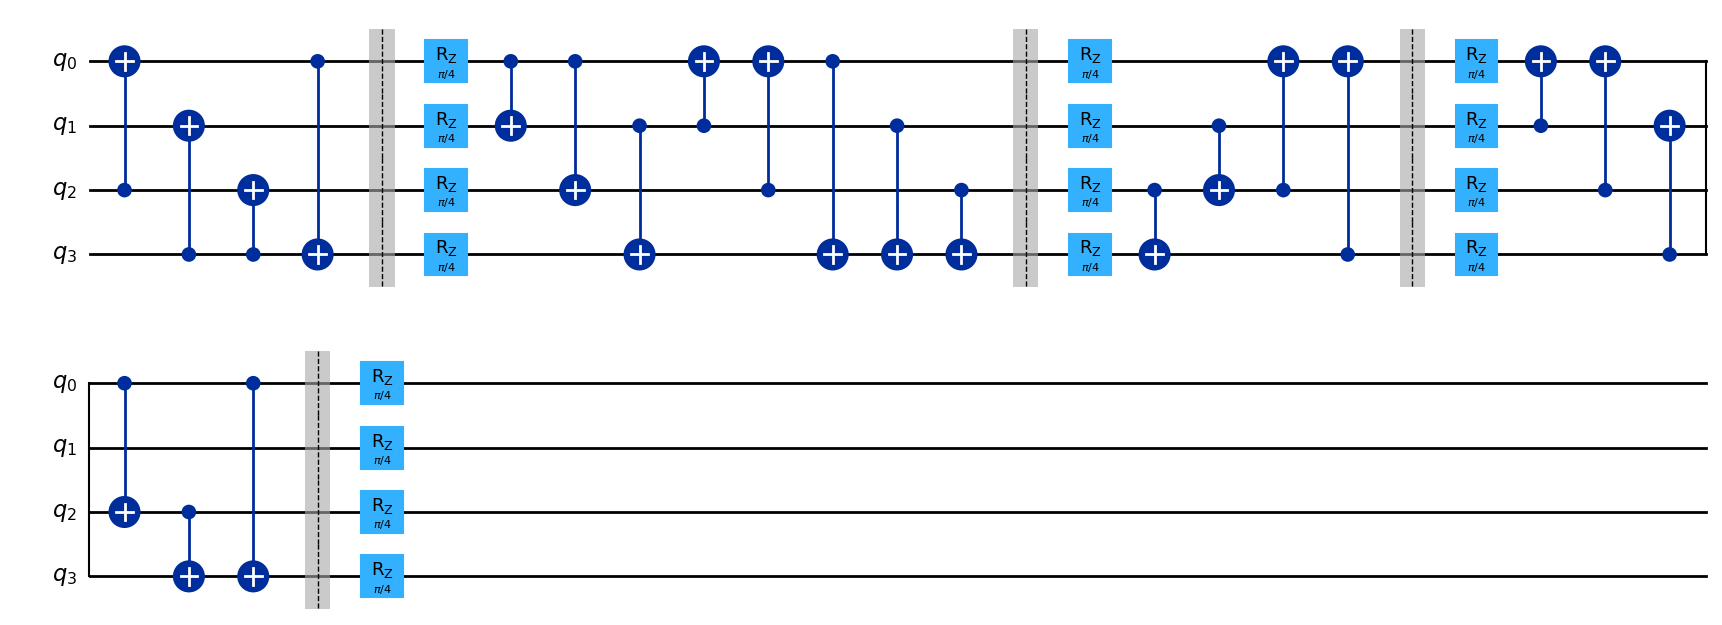

In [95]:
qc.draw("mpl")

In [119]:
from random import shuffle

In [120]:
qubits=4
p_set = set(np.arange(0, 16))
p_set.remove(0)
pf = PauliFrame(qubits)
for p in pf.front[:, 1]:
    if p in p_set:
        p_set.remove(p)


Rank:4
Original Frame:
 [1 1], IIIZ, IIIX
[1 1], IIZI, IIXI
[1 1], IZII, IXII
[1 1], ZIII, XIII

Decomposition cost: 7 (lu) 3 (ul)
New frame:
[1 1], IIZZ, XXIX
[1 1], IIZI, XXXX
[1 1], IZIZ, IXII
[1 1], ZIIZ, XIII

Intended New Pauli frame ['IIZZ', 'IZIZ', 'IIZI', 'ZIIZ']
Rank:3
Original Frame:
 [1 1], IIZZ, XXIX
[1 1], IIZI, XXXX
[1 1], IZIZ, IXII
[1 1], ZIIZ, XIII

Decomposition cost: 6 (lu) 7 (ul)
New frame:
[1 1], IZZI, XXII
[1 1], IIZI, XXXX
[1 1], IIZZ, IIIX
[1 1], ZZII, XIII

Intended New Pauli frame ['ZIZI', 'ZZII', 'ZZZZ', 'IZZI']
Rank:3
Original Frame:
 [1 1], IZZI, XXII
[1 1], IIZI, XXXX
[1 1], IIZZ, IIIX
[1 1], ZZII, XIII

Decomposition cost: 4 (lu) 5 (ul)
New frame:
[1 1], ZIZI, IXXI
[1 1], ZZZI, XXXX
[1 1], ZZZZ, IIIX
[1 1], IZZI, XIXI

Intended New Pauli frame ['ZIZI', 'ZZII', 'ZZZZ', 'IZZI']
Rank:3
Original Frame:
 [1 1], ZIZI, IXXI
[1 1], ZZZI, XXXX
[1 1], ZZZZ, IIIX
[1 1], IZZI, XIXI

Decomposition cost: 2 (lu) 2 (ul)
New frame:
[1 1], ZIZI, XIIX
[1 1], IIZI, XXXX
[1 

ValueError: not enough values to unpack (expected 2, got 1)

In [94]:
qc=pf.to_qiskit_circuit()

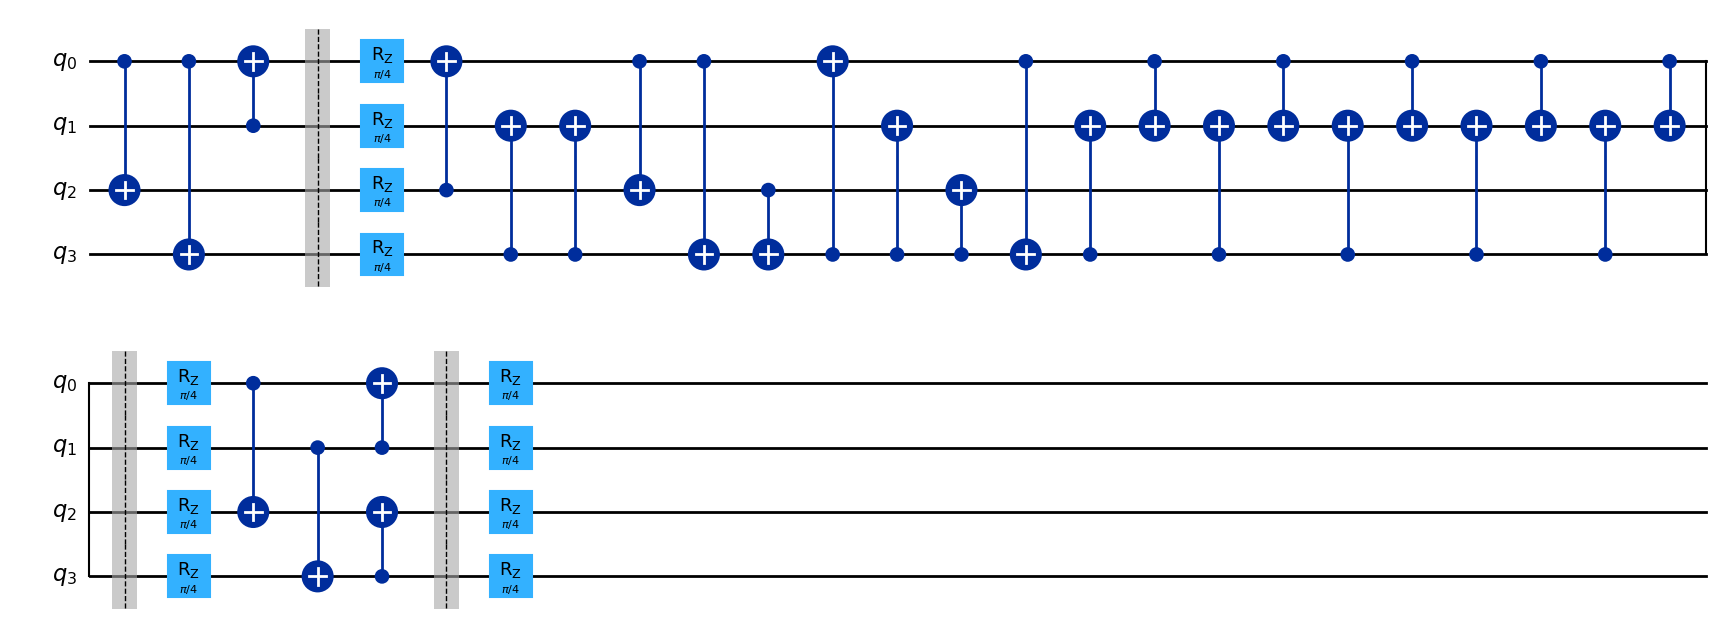

In [95]:
qc.draw("mpl")

In [30]:
from qiskit import QuantumCircuit

In [31]:
qc = QuantumCircuit(4)

In [32]:
qc.rz(np.pi/4, 2)

In [60]:
qc.cx(0, 1) 
qc.cx(0, 2)
qc.cx(0, 3)
qc.cx(3, 0) 
qc.cx(1, 2)
qc.cx(2, 3) 
qc.cx(2, 1)
qc.cx(3, 2) 
qc.cx(0, 2) 
qc.cx(0, 2) 
qc.cx(1, 3)
qc.cx(1, 3) 
qc.cx(2, 1)

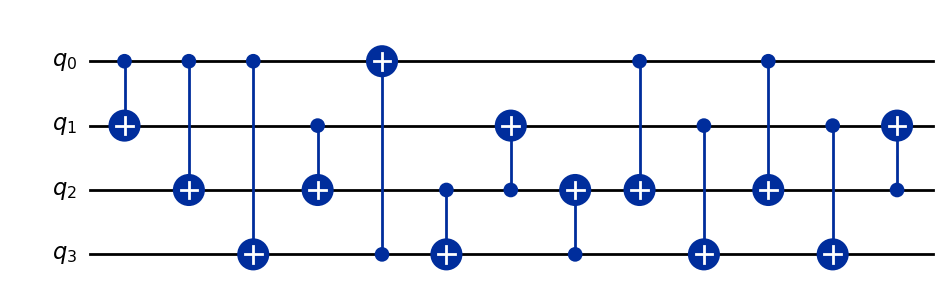

In [61]:
qc.draw("mpl")

In [62]:
from qiskit import QuantumCircuit

In [63]:
qc = QuantumCircuit(4)

In [64]:
qc.cx(0, 2)
qc.cx(0, 3)
qc.cx(1, 0)
qc.cx(3, 1)
qc.cx(2, 0)
qc.cx(2, 1)
qc.cx(0, 2)
qc.cx(1, 3)
qc.cx(2, 0)
qc.cx(0, 1)
qc.cx(0, 3)
qc.cx(1, 3)
qc.cx(2, 3)
qc.cx(0, 3)
qc.cx(1, 0)
qc.cx(3, 0)
qc.cx(3, 1)
qc.cx(0, 2)
qc.cx(1, 3)
qc.cx(2, 3)
qc.cx(0, 3)


## Universal IZ family structure

For 4 qubit system

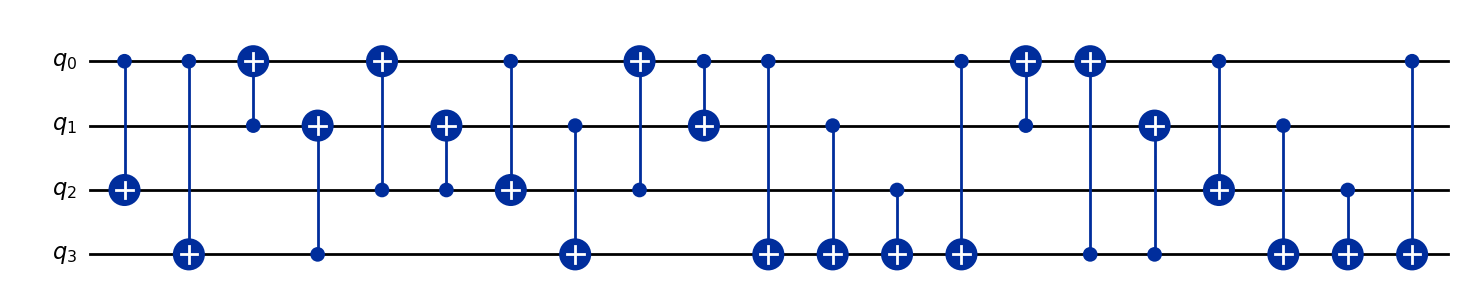

In [65]:
qc.draw("mpl")

## Test the library with QAOA ansatz

In [120]:
qubits = 10

In [256]:
pset = [
    "IIIIIIIIZZ",
    "IIIIIIIZIZ",
    "IIIIIIZIIZ",
    "IIIIIZIIIZ",
    "IIIIZIIIIZ",
    "IIIZIIIIIZ",
    "IIZIIIIIIZ",
    "IIZIIIIIIZ",
    "IZIIIIIIIZ",
    "ZIIIIIIIIZ",

    "IIIIIIIZZI",
    "IIIIIIZIZI",
    "IIIIIZIIZI",
    "IIIIZIIIZI",
    "IIIZIIIIZI",
    "IIZIIIIIZI",
    "IIZIIIIIZI",
    "IZIIIIIIZI",
    "ZIIIIIIIZI",

    "IIIIIIZZII",
    "IIIIIZIZII",
    "IIIIZIIZII",
    "IIIZIIIZII",
    "IIZIIIIZII",
    "IIZIIIIZII",
    "IZIIIIIZII",
    "ZIIIIIIZII",

    "IIIIIZZIII",
    "IIIIZIZIII",
    "IIIZIIZIII",
    "IIZIIIZIII",
    "IIZIIIZIII",
    "IZIIIIZIII",
    "ZIIIIIZIII",

    "IIIIZZIIII",
    "IIIZIZIIII",
    "IIZIIZIIII",
    "IIZIIZIIII",
    "IZIIIZIIII",
    "ZIIIIZIIII",

    "IIIZZIIIII",
    "IIZIZIIIII",
    "IIZIZIIIII",
    "IZIIZIIIII",
    "ZIIIZIIIII",

    "IIZZIIIIII",
    "IZIZIIIIII",
    "ZIIZIIIIII",

    "IZZIIIIIII",
    "ZIZIIIIIII",

    "ZZIIIIIIII",

    "IIIIIIIIIZ",
    "IIIIIIIIZI",
    "IIIIIIIZII",
    "IIIIIIZIII",
    "IIIIIZIIII",
    "IIIIZIIIII",
    "IIIZIIIIII",
    "IIZIIIIIII",
    "IZIIIIIIII",
    "ZIIIIIIIII",
]


In [258]:
str2intarr("IIZ")

array([0, 0, 1])

In [259]:
import galois
GF_2 = galois.GF(2)

In [260]:
M = np.array(
    [
        [1, 1, 0, 0],
        [0, 1, 1, 0],
        [1, 0, 1, 0],
        [0, 1, 0, 1]
    ]
)

In [261]:
GF_2(M)

GF([[1, 1, 0, 0],
    [0, 1, 1, 0],
    [1, 0, 1, 0],
    [0, 1, 0, 1]], order=2)

In [ ]:
for p in paulis:
    L = pf.relative_supp(from_pstr(p, 1.0).sym_code) -1
    if L == -1:
        L = 0
    distance[L].append(p)
print("Applying current frame elements")
for p in distance[0]:
    if p == qubits*"I":
        continue
    i = np.where(pf.front[:, 1] == pstr2sym_code(p)[1])[0][0]
    circuit.append(("rz", 0., i))
    paulis_set.remove(p)

In [ ]:
# construct a new frame to rotate
print("Construct a new frame from the remained terms")
p_frame = []
if len(distance[1]) == qubits:
    p_frame = distance[1]
else:
    p_frame = p_frame + distance[1][:qubits] # How to make linearly independent set
    while len(p_frame) < qubits:
        for k in range(2, qubits):
            l = qubits - len(p_frame)
            if qubits - len(p_frame) >= len(distance[k]):
                p_frame = p_frame + distance[k]
            else:
                p_frame = p_frame + distance[k][:l]
print(p_frame)

In [122]:
from opttrot.pauli_utils import get_pauli_fam_terms

In [140]:
Z_fam_4 = get_pauli_fam_terms(4)
pf = PauliFrame(4)
p_set = Z_fam_4

In [162]:
def str2intarr(s):
    s = s.replace("I", "0")
    s = s.replace("Z", "1")
    return np.array([int(i) for i in s])

In [141]:
# Calculate distance from the frame
distance = {}
for p in p_set:
    L = pf.relative_supp(from_pstr(p, 1.0).sym_code) -1
    if L == -1:
        L = 0
    if L not in distance.keys():
        distance[L] = []
    distance[L].append(p)
# Remove current frame elements
p_set = set(p_set)
for p in distance[0]:
    if p == qubits*"I":
        p_set.remove(p)
        continue
    i = np.where(pf.front[:, 1] == pstr2sym_code(p)[1])[0][0]
    p_set.remove(p)

In [142]:
distance

{0: ['IIII', 'IIIZ', 'IIZI', 'IZII', 'ZIII'],
 1: ['IIZZ', 'IZIZ', 'IZZI', 'ZIIZ', 'ZIZI', 'ZZII'],
 2: ['IZZZ', 'ZIZZ', 'ZZIZ', 'ZZZI'],
 3: ['ZZZZ']}

In [143]:
p_set

{'IIZZ',
 'IZIZ',
 'IZZI',
 'IZZZ',
 'ZIIZ',
 'ZIZI',
 'ZIZZ',
 'ZZII',
 'ZZIZ',
 'ZZZI',
 'ZZZZ'}

In [161]:
p_in_str = []
for i in distance.keys():
    if i ==0:
        continue
    p_set = distance[i]
    print(p_set)
    p_vecs = [str2intarr(s) for s in p_set]
    N = len(p_set[0])
    
    pset = set(p_set)
    while len(pset) >0:
        print("P_set len:", len(pset))
        v_set = set(pset)
        p_in = []
        not_indep = []

        while(len(v_set) >0 and len(p_in_str) <N):
            if len(p_in) <=1:
                p = v_set.pop()
                p_in.append(str2intarr(p))
                p_in_str.append(p)
                continue
            p_new = v_set.pop()
            v_new  = str2intarr(p_new)
            M = GF2(np.vstack([p_in, v_new]).T)
            #print(M, v_new)
            if np.linalg.matrix_rank(M) == len(p_in) + 1:
                p_in.append(v_new)
                p_in_str.append(p_new)
            else:
                not_indep.append(p_new)
        print(len(p_in_str))
        print("Independent sets:", p_in_str)
        if len(p_in_str) >=N:
            break
        pset = list(v_set)
    if len(p_in_str) >=N:
            break


['IIZZ', 'IZIZ', 'IZZI', 'ZIIZ', 'ZIZI', 'ZZII']
P_set len: 6
3
Independent sets: ['IZIZ', 'ZIIZ', 'IIZZ']
['IZZZ', 'ZIZZ', 'ZZIZ', 'ZZZI']
P_set len: 4
4
Independent sets: ['IZIZ', 'ZIIZ', 'IIZZ', 'ZZZI']


In [168]:
def str2intarr(s):
    s = s.replace("I", "0")
    s = s.replace("Z", "1")
    return np.array([int(i) for i in s])
def get_independent_sets(
        p_set, # Pauli string list 
        pf:PauliFrame):
    
    # Calculate distance from the frame
    distance = {}
    for p in p_set:
        L = pf.relative_supp(from_pstr(p, 1.0).sym_code) -1
        if L == -1:
            L = 0
        if L not in distance.keys():
            distance[L] = []
        distance[L].append(p)
    # Remove current frame elements
    p_set = set(p_set)
    for p in distance[0]:
        if p == qubits*"I":
            p_set.remove(p)
            continue
        i = np.where(pf.front[:, 1] == pstr2sym_code(p)[1])[0][0]
        p_set.remove(p)
    
    
    p_in_str = []
    for i in distance.keys():
        if i ==0:
            continue
        p_set = distance[i]
        print(p_set)
        p_vecs = [str2intarr(s) for s in p_set]
        N = len(p_set[0])

        pset = set(p_set)
        while len(pset) >0:
            print("P_set len:", len(pset))
            v_set = set(pset)
            p_in = []
            not_indep = []

            while(len(v_set) >0 and len(p_in_str) <N):
                if len(p_in) <=1:
                    p = v_set.pop()
                    p_in.append(str2intarr(p))
                    p_in_str.append(p)
                    continue
                p_new = v_set.pop()
                v_new  = str2intarr(p_new)
                M = GF2(np.vstack([p_in, v_new]).T)
                #print(M, v_new)
                if np.linalg.matrix_rank(M) == len(p_in) + 1:
                    p_in.append(v_new)
                    p_in_str.append(p_new)
                else:
                    not_indep.append(p_new)
            print(len(p_in_str))
            print("Independent sets:", p_in_str)
            if len(p_in_str) >=N:
                break
            pset = list(v_set)
        if len(p_in_str) >=N:
                break
    return p_in_str

In [169]:
Z_fam_4 = get_pauli_fam_terms(4)
pf = PauliFrame(4)
p_set = Z_fam_4
ind_p_set = get_independent_sets(p_set, pf)

['IIZZ', 'IZIZ', 'IZZI', 'ZIIZ', 'ZIZI', 'ZZII']
P_set len: 6
3
Independent sets: ['IZIZ', 'ZIIZ', 'IIZZ']
['IZZZ', 'ZIZZ', 'ZZIZ', 'ZZZI']
P_set len: 4
4
Independent sets: ['IZIZ', 'ZIIZ', 'IIZZ', 'ZZZI']


In [167]:
ind_p_set

['IZIZ', 'ZIIZ', 'IIZZ', 'ZZZI']